# Step 4: Pre-processing

## Introduction

## Imported Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings  
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy")
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

## Data

In [2]:
df = pd.read_csv('collegedata_EDAd.csv')
print(df.head(2))

                             chronname        city    state   level control  \
0               Alabama A&M University      Normal  Alabama  4-year  Public   
1  University of Alabama at Birmingham  Birmingham  Alabama  4-year  Public   

                                               basic hbcu flagship  \
0  Masters Colleges and Universities--larger prog...  yes       no   
1  Research Universities--very high research acti...   no       no   

   student_count  awards_per_value  ...  grad_100_value  grad_150_value  \
0           4051              14.2  ...            10.0            29.1   
1          11502              20.9  ...            29.4            53.5   

   pell_value  retain_value  ft_fac_value  state_sector_ct  carnegie_ct  \
0        71.2          63.1          82.8               13          386   
1        35.1          80.2          92.4               13          106   

   counted_pct  cohort_size  num_similar  
0         99.7        882.0         20.0  
1         56.

In [3]:
print(df.shape)

(3798, 30)


In [4]:
print(df.columns)

Index(['chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu',
       'flagship', 'student_count', 'awards_per_value',
       'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value',
       'exp_award_state_value', 'exp_award_natl_value', 'ft_pct', 'fte_value',
       'med_sat_value', 'aid_value', 'endow_value', 'grad_100_value',
       'grad_150_value', 'pell_value', 'retain_value', 'ft_fac_value',
       'state_sector_ct', 'carnegie_ct', 'counted_pct', 'cohort_size',
       'num_similar'],
      dtype='object')


In [5]:
names_list = ['chronname', 'city', 'state']
df.drop(columns=names_list, inplace=True)
print(df.shape)

(3798, 27)


## Target Variable

In [11]:
df['awards_per_value'].describe()

count    3798.000000
mean       23.435176
std        10.615140
min         0.500000
25%        17.300000
50%        21.300000
75%        26.500000
max       137.600000
Name: awards_per_value, dtype: float64

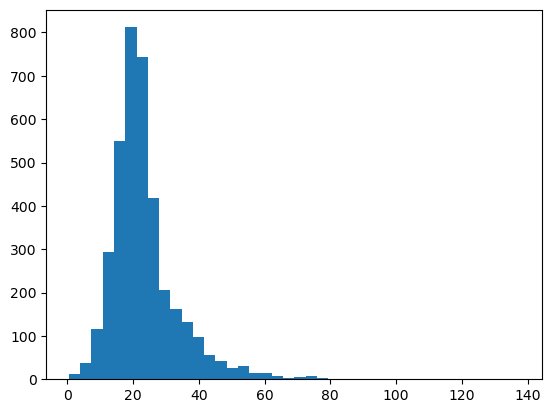

In [9]:
plt.hist(df['awards_per_value'], bins=40)
plt.show();